# Supervised Learning: Logistic Regression, Overfitting & Regularization (Part 3)

---

## Classification Problems Revisited

* **Linear Regression is NOT suitable for classification.**
    * It outputs continuous values (not categories).
    * Outlier examples can drastically shift the linear fit, leading to incorrect decision boundaries.
* **Binary Classification:** Problems with two possible outputs.
    * **Common Classes:** No/Yes, False/True, or most commonly **0/1**.
        * **0:** Negative Class (e.g., not spam, benign tumor).
        * **1:** Positive Class (e.g., spam, malignant tumor).

---

## Logistic Regression Model

* **Purpose:** The most widely used classification algorithm, specifically for binary classification ($y=0$ or $y=1$).
* **Output Interpretation:** Outputs the **probability** that the class $y$ is $1$ given input $X$. This output is always between **0 and 1**.
    * Example: An output of $0.7$ for a tumor means a 70% chance of being malignant.

### The Sigmoid Function (Logistic Function)

* **Formula:**
    $$ g(z) = \frac{1}{1 + e^{-z}} $$
    * $e \approx 2.71828$ (mathematical constant).
* **Properties:**
    * Maps any real number $z$ to a value between **0 and 1**.
    * $g(z) \to 1$ as $z \to \infty$.
    * $g(z) \to 0$ as $z \to -\infty$.
    * $g(0) = 0.5$.

### Logistic Regression Model Formula

* **Steps:**
    1.  Compute a linear combination: $z = W \cdot X + b$
    2.  Apply the Sigmoid function to $z$: $f_{W,b}(X) = g(z) = g(W \cdot X + b)$
* **Full Formula:**
    $$ f_{W,b}(X) = \frac{1}{1 + e^{-(W \cdot X + b)}} $$
    * This $f_{W,b}(X)$ is interpreted as $P(y=1 | X; W, b)$.

---

--- Demo 1: Sigmoid Function ---


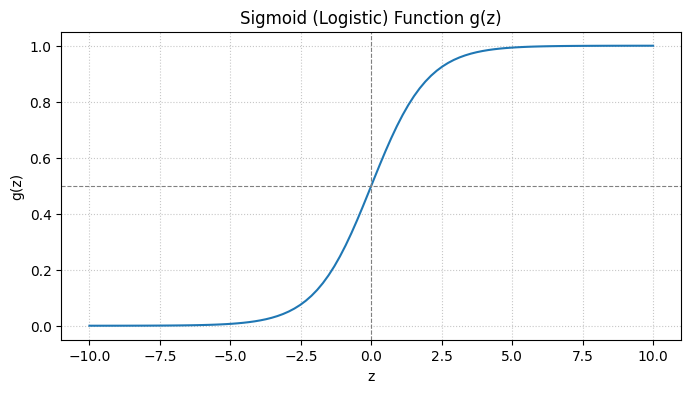

For tumor size 5.0:
  Z value (w*x+b): 0.50
  Predicted probability of malignancy (y=1): 0.622
  Predicted probability of benign (y=0): 0.378



In [4]:
# --- Demo 1: Sigmoid Function ---
import numpy as np
import matplotlib.pyplot as plt

print("--- Demo 1: Sigmoid Function ---")

def sigmoid(z):
    """
    Computes the sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

# Generate z values from -10 to 10 for plotting
z_values = np.linspace(-10, 10, 100)
g_z = sigmoid(z_values)

# Plot the sigmoid function
plt.figure(figsize=(8, 4))
plt.plot(z_values, g_z)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8) # Line at z=0
plt.axhline(0.5, color='grey', linestyle='--', linewidth=0.8) # Line at g(z)=0.5
plt.title('Sigmoid (Logistic) Function g(z)')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

# Example interpretation of output probability
tumor_size_example = 5.0 # Arbitrary example tumor size
# Arbitrary w and b for illustration (not learned parameters)
w_illustrative = 1.5
b_illustrative = -7.0
z_illustrative = w_illustrative * tumor_size_example + b_illustrative
prob_malignant = sigmoid(z_illustrative)

print(f"For tumor size {tumor_size_example}:")
print(f"  Z value (w*x+b): {z_illustrative:.2f}")
print(f"  Predicted probability of malignancy (y=1): {prob_malignant:.3f}")
print(f"  Predicted probability of benign (y=0): {1 - prob_malignant:.3f}\n")

## Decision Boundary

* **Definition:** A boundary in the input space that separates regions where the model predicts $\hat{y}=1$ from regions where it predicts $\hat{y}=0$.
* **Prediction Threshold:** Common choice is to predict:
    * $\hat{y}=1$ if $f_{W,b}(X) \ge 0.5$
    * $\hat{y}=0$ if $f_{W,b}(X) < 0.5$
* **Derivation for Decision Boundary:**
    * $\hat{y}=1$ when $f_{W,b}(X) \ge 0.5 \implies g(z) \ge 0.5 \implies z \ge 0$.
    * Thus, $\hat{y}=1$ when $W \cdot X + b \ge 0$.
    * The **decision boundary** itself is where $W \cdot X + b = 0$.

* **Types of Decision Boundaries:**
    * **Linear Decision Boundary:** Occurs if only original features ($x_1, x_2, \dots$) are used.
        * Example (2 features): $w_1x_1 + w_2x_2 + b = 0$ defines a straight line.
    * **Non-linear Decision Boundary:** Achieved by incorporating **polynomial features** (e.g., $x_1^2, x_2^2, x_1x_2$) into $X$.
        * Allows for complex shapes like circles, ellipses, or more intricate curves.

---

## Cost Function for Logistic Regression

* **Problem with Squared Error Cost:** Using the squared error cost function for logistic regression results in a **non-convex cost function** (wiggly with many local minima). Gradient Descent would not guarantee finding the global minimum.

* **Solution: Log Loss (Binary Cross-Entropy Loss)**
    * This cost function is **convex**, ensuring Gradient Descent can find the global minimum.
    * **Loss for a single example $i$:**
        * If $y^{(i)} = 1$: $L = -\log(f_{W,b}(x^{(i)}))$
        * If $y^{(i)} = 0$: $L = -\log(1 - f_{W,b}(x^{(i)}))$
    * **Combined Loss Function (for $y \in \{0, 1\}$):**
        $$ L(f_{W,b}(x^{(i)}), y^{(i)}) = -y^{(i)}\log(f_{W,b}(x^{(i)})) - (1-y^{(i)})\log(1-f_{W,b}(x^{(i)})) $$
    * **Overall Cost Function ($J(W, b)$):** The average loss over all $m$ training examples.
        $$ J(W, b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log(f_{W,b}(x^{(i)})) + (1-y^{(i)})\log(1-f_{W,b}(x^{(i)}))] $$
    * **Rationale:** Derived from statistical principle of **Maximum Likelihood Estimation**.

---

In [5]:
# --- Demo 2: Logistic Loss Function (for single example) ---
import numpy as np

print("--- Demo 2: Logistic Loss Function (for single example) ---")

# Define the sigmoid function (re-defined for clarity in this block)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the loss function for a single example
def compute_loss(f_x, y_true):
    """
    Computes the loss for a single training example in logistic regression.
    f_x: model's prediction (probability, between 0 and 1)
    y_true: actual label (0 or 1)
    """
    # Clip f_x to prevent log(0) which is -inf, ensuring numerical stability
    f_x = np.clip(f_x, 1e-10, 1 - 1e-10) # 1e-10 is a very small number close to 0

    if y_true == 1:
        loss = -np.log(f_x)
    else: # y_true == 0
        loss = -np.log(1 - f_x)
    return loss

# Example: True label is 1 (e.g., malignant tumor)
y_true_1 = 1
predictions_for_y1 = np.array([0.99, 0.7, 0.5, 0.1, 0.01])
print(f"When y_true = {y_true_1}:")
for pred in predictions_for_y1:
    loss_val = compute_loss(pred, y_true_1)
    print(f"  Prediction f(x) = {pred:.2f}, Loss = {loss_val:.4f}")

print("\n(Loss is low when prediction is close to 1, high when close to 0)\n")

# Example: True label is 0 (e.g., benign tumor)
y_true_0 = 0
predictions_for_y0 = np.array([0.01, 0.3, 0.5, 0.9, 0.99])
print(f"When y_true = {y_true_0}:")
for pred in predictions_for_y0:
    loss_val = compute_loss(pred, y_true_0)
    print(f"  Prediction f(x) = {pred:.2f}, Loss = {loss_val:.4f}")

print("\n(Loss is low when prediction is close to 0, high when close to 1)")

--- Demo 2: Logistic Loss Function (for single example) ---
When y_true = 1:
  Prediction f(x) = 0.99, Loss = 0.0101
  Prediction f(x) = 0.70, Loss = 0.3567
  Prediction f(x) = 0.50, Loss = 0.6931
  Prediction f(x) = 0.10, Loss = 2.3026
  Prediction f(x) = 0.01, Loss = 4.6052

(Loss is low when prediction is close to 1, high when close to 0)

When y_true = 0:
  Prediction f(x) = 0.01, Loss = 0.0101
  Prediction f(x) = 0.30, Loss = 0.3567
  Prediction f(x) = 0.50, Loss = 0.6931
  Prediction f(x) = 0.90, Loss = 2.3026
  Prediction f(x) = 0.99, Loss = 4.6052

(Loss is low when prediction is close to 0, high when close to 1)


## Gradient Descent for Logistic Regression

* **Objective:** Minimize $J(W, b)$ to find optimal parameters $W$ and $b$.
* **Update Rules (Simultaneous Update):**
    * For each $w_j$ ($j=1, \dots, n$):
        $$ w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(W, b) $$
    * For $b$:
        $$ b := b - \alpha \frac{\partial}{\partial b} J(W, b) $$
* **Derivative Terms:**
    * With respect to $w_j$:
        $$ \frac{\partial}{\partial w_j} J(W, b) = \frac{1}{m} \sum_{i=1}^{m} (f_{W,b}(x^{(i)}) - y^{(i)})x_j^{(i)} $$
    * With respect to $b$:
        $$ \frac{\partial}{\partial b} J(W, b) = \frac{1}{m} \sum_{i=1}^{m} (f_{W,b}(x^{(i)}) - y^{(i)}) $$
* **Key Similarity to Linear Regression:** The *form* of these update equations (with `f(X)` terms) looks identical to linear regression.
* **Key Difference from Linear Regression:** The definition of $f_{W,b}(X)$ is different:
    * Linear Regression: $f_{W,b}(X) = W \cdot X + b$
    * Logistic Regression: $f_{W,b}(X) = g(W \cdot X + b)$ (where $g$ is Sigmoid).
* **Practical Considerations:**
    * **Vectorization:** Apply vectorization for faster computation, as with linear regression.
    * **Feature Scaling:** Crucial for faster convergence of Gradient Descent by normalizing feature ranges.
    * **Convergence Monitoring:** Use learning curves (plot $J$ vs. iterations) to check for proper convergence (consistently decreasing $J$).
    * **Learning Rate ($\alpha$) Selection:** Experiment with values (e.g., 0.001, 0.003, 0.01...) to find the largest $\alpha$ that provides rapid, consistent decrease in $J$.

---

## Overfitting and Underfitting

* **Underfitting (High Bias):**
    * **Definition:** Model is too simple; it fails to capture the training data's underlying patterns.
    * **Symptoms:** High error on both training data and new data.
    * **Example:** Fitting a straight line to non-linear data; a linear decision boundary for non-linear separable classification data.
* **Overfitting (High Variance):**
    * **Definition:** Model is too complex; it fits the training data (including noise) "too well" but performs poorly on new, unseen data. It doesn't **generalize** well.
    * **Symptoms:** Very low error on training data, but high error on new data. Model is overly sensitive to training data specifics.
    * **Example:** Fitting a high-order polynomial that is "wiggly" to perfectly pass through training points; a convoluted decision boundary that perfectly separates training examples.
* **Goal:** Find a model that is "just right" (neither underfitting nor overfitting, having both low bias and low variance).

---

## Addressing Overfitting

1.  **Collect More Training Data:** The most effective method, if feasible. More data helps the model learn more generalizable patterns.
2.  **Use Fewer Features (Feature Selection):** Select a subset of the most relevant features. Disadvantage: Might discard useful information.
3.  **Regularization (Common and Powerful):**
    * **Core Idea:** Penalize large parameter values ($w_j$) to encourage a simpler, smoother model.
    * **Convention:** Regularize $w_j$ parameters, but typically not the bias parameter $b$.

---

### Regularization Cost Function

* **Modified Cost Function:** Adds a **regularization term** to the original cost function.
* **For Linear Regression (Regularized Mean Squared Error):**
    $$ J(W, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{W,b}(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2 $$
* **For Logistic Regression (Regularized Log Loss):**
    $$ J(W, b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log(f_{W,b}(x^{(i)})) + (1-y^{(i)})\log(1-f_{W,b}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2 $$
* **Key Elements:**
    * **Original Cost Term:** Measures model fit.
    * **Regularization Term:** $\frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2$
    * **$\lambda$ (Lambda): Regularization Parameter:**
        * Controls the **trade-off** between fitting the training data and keeping parameters small.
        * **$\lambda = 0$:** No regularization (prone to overfitting).
        * **$\lambda$ is very large:** Strong regularization, forces $w_j \to 0$ (prone to underfitting).
        * **"Just right" $\lambda$:** Balances goals for optimal performance.

---

### Gradient Descent with Regularization

* **Update Rule for each $w_j$ ($j=1, \dots, n$):**
    $$ w_j := w_j - \alpha \left[ \left( \frac{1}{m} \sum_{i=1}^{m} (f_{W,b}(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m} w_j \right] $$
    * **Intuition:** Each $w_j$ is slightly shrunk (multiplied by $1 - \alpha \frac{\lambda}{m}$) in each iteration before the usual update.
* **Update Rule for $b$ (No Regularization):**
    $$ b := b - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_{W,b}(x^{(i)}) - y^{(i)}) $$
* **Important:** $f_{W,b}(X)$ depends on the specific model (linear vs. logistic regression). Always perform **simultaneous updates**.

---

### Scikit-learn (Mentioned)

* A popular open-source Python ML library used for implementing various algorithms including logistic regression.

---

In [6]:
# --- Demo 3: Conceptual Regularization Update Effect ---
import numpy as np

print("--- Demo 3: Conceptual Regularization Update Effect ---")

# Simulate a single weight w_j
w_j_initial = 10.0 # Initial large weight
alpha = 0.01      # Learning rate
lambda_reg = 1.0  # Regularization parameter
m = 50            # Number of training examples

# Simulate a 'derivative_term' from the error part of the cost (without regularization)
# In a real gradient descent step, this comes from (f(x) - y) * x_j summed over examples
derivative_term_unreg = 0.5 # Arbitrary example value

print(f"Initial w_j: {w_j_initial:.4f}\n")

# Calculate the shrinking factor due to regularization
shrink_factor = (1 - alpha * (lambda_reg / m))
print(f"Calculated shrink factor (1 - alpha*lambda/m): {shrink_factor:.4f}")

# Apply the update rule for w_j with regularization, broken down for intuition
# This shows that w_j is effectively multiplied by a number slightly less than 1
# before the regular 'error-driven' update.
w_j_after_shrink_only = w_j_initial * shrink_factor
w_j_final_conceptual = w_j_after_shrink_only - (alpha * derivative_term_unreg)

print(f"w_j after conceptual 'shrink and update': {w_j_final_conceptual:.4f}")

# Direct application of the full regularized derivative formula (how it's typically computed)
# The full derivative term becomes (unreg_derivative + lambda/m * w_j_current)
full_derivative_term = derivative_term_unreg + (lambda_reg / m) * w_j_initial
w_j_final_direct = w_j_initial - alpha * full_derivative_term

print(f"w_j after direct formula update: {w_j_final_direct:.4f}")
print("\n(Notice how regularization causes w_j to be slightly smaller than without it.)")

--- Demo 3: Conceptual Regularization Update Effect ---
Initial w_j: 10.0000

Calculated shrink factor (1 - alpha*lambda/m): 0.9998
w_j after conceptual 'shrink and update': 9.9930
w_j after direct formula update: 9.9930

(Notice how regularization causes w_j to be slightly smaller than without it.)
